In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
import matplotlib.cm as cm

import pickle
%matplotlib inline


In [3]:
df = pd.read_csv("../dataset/Absenteeism_at_work.csv", delimiter = ";")

In [4]:
#Since the column names are an ‘index’ type, you can use .str on them too. 
#You can fix all these lapses of judgement by chaining together a bunch 
#of these .str functions. Like so:



df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


/var/folders/2s/pjl2sg357mxgsvkyn1r7tjkm0000gn/T/ipykernel_5305/331755489.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
/var/folders/2s/pjl2sg357mxgsvkyn1r7tjkm0000gn/T/ipykernel_5305/331755489.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [5]:
renacol = {'ID':'id','reason_for_absence"':'reason_for_absence', 'month_of_absence"':'month_of_absence', 
           'day_of_the_week':'day_of_the_week','seasons':'seasons', 'transportation_expense':'transportation_expense',
           'distance_from_residence_to_work"':'distance_from_residence_to_work', 'service_time':'service_time', 
           'age':'age', '2work_load_average/day_"':'work_load_average/day', 'hit_target':'hit_target',
           'disciplinary_failure':'disciplinary_failure', 'education':'education', 'son':'son', 
           'social_drinker':'social_drinker', '2social_smoker"':'social_smoker', 'pet':'pet', 'weight': 'weight',
           'height':'height', 'body_mass_index':'body_mass_index', 'absenteeism_time_in_hours"':'absenteeism_time_in_hours'}



In [6]:
df = df.rename(columns=renacol)
df

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [7]:
df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

In [8]:
df.describe()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [9]:
#df.drop(['id'],axis=1,inplace=True)

In [11]:
# We divided dataset of numerical columns and categorical ones



# numerical_atts are group of no missing absenteeism data 

categorical_atts = ['reason_for_absence', 'month_of_absence', 'day_of_the_week','seasons','disciplinary_failure', 'education', 'social_drinker','social_smoker', 'pet', 'son']

numerical_atts = df.drop(columns=categorical_atts).columns.to_list()

       


In [12]:
# number of unique values in categorical atts
df[categorical_atts].nunique()

reason_for_absence      28
month_of_absence        13
day_of_the_week          5
seasons                  4
disciplinary_failure     2
education                4
social_drinker           2
social_smoker            2
pet                      6
son                      5
dtype: int64

In [13]:
# Check for outliers using boxplots and drop them

# Check for total number os categorical_atts

for num_att in numerical_atts:
    
    # Getting 75 and 25 percentile of variable "i"
    Q3, Q1 = np.percentile(df[num_att], [75,25])
    MEAN = df[num_att].mean()
    
    # Calculating Interquartile range
    IQR = Q3 - Q1
    
    # Calculating upper extream and lower extream
    minimum = Q1 - (IQR*1.5)
    maximum = Q3 + (IQR*1.5)
    
    # Replacing all the outliers value to Mean
    data_clean=df.drop(df.loc[df[num_att]< minimum,num_att].index) 
    data_clean=df.drop(df.loc[df[num_att]> maximum,num_att].index) 


In [14]:
# size reduced to 150 from 740 - is the same of those without missing values dataset in absenteeism 
# equal 1


len(data_clean)

696

_ We make transformation of data as a pre processing step and then go we created a preprocessor variables to make a data_pp ( with all inputation, transformation, and standardization made 
)

In [15]:
# transform data
numeric_transformer = MinMaxScaler()
#categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')

# exclude target attr,bute
numerical_atts = [x for x in numerical_atts if x not in ['Absenteeism time in hours']]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_atts),
        ('cat', 'passthrough', categorical_atts)
    ], remainder='passthrough')
data_pp = preprocessor.fit_transform(data_clean)

In [166]:
data_pp

array([[0.28571429, 0.63333333, 0.65957447, ..., 0.        , 1.        ,
        2.        ],
       [1.        , 0.        , 0.17021277, ..., 0.        , 0.        ,
        1.        ],
       [0.05714286, 0.22592593, 0.9787234 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08571429, 0.        , 0.19148936, ..., 0.        , 8.        ,
        1.        ],
       [0.2       , 0.41851852, 0.63829787, ..., 0.        , 2.        ,
        2.        ],
       [0.97142857, 0.22592593, 0.85106383, ..., 0.        , 1.        ,
        1.        ]])


# FEATURE SELECTION¶


- Random forest importance
- Train a RF model to see feature importances

In [16]:
# X, y splitting (we dont need train test splitting since this model is just for feature importances)


y_original = data_pp[:,-1].reshape(-1, 1)
y = np.round(MinMaxScaler((0,2)).fit_transform(y_original)).ravel()
X = np.delete(data_pp,-1,1) 

# cross-validation with 10 splits
cross_val = ShuffleSplit(n_splits=10, random_state = 42)

# define model
rf = RandomForestClassifier(random_state = 0,max_features=None,n_jobs=-1)

# parameters 
parameters = {  
                "n_estimators":[1000],
                #'max_depth': list(range(1,11)),
                #"criterion": ["gini","entropy"],
                #"criterion": ["mse","mae"],
                #"class_weight": [None, "balanced"],
                #"max_features":["auto", None, "log2"],
                }

# grid search for parameters
grid = GridSearchCV(estimator=rf, param_grid=parameters, cv=cross_val, n_jobs=-1)#multithreading; all cores are used
grid.fit(X,y)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid.best_params_, grid.best_score_))


The best parameters are {'n_estimators': 1000} with a score of 0.9986


In [21]:
# Build a variable to pie-chart representation

In [17]:
# pie-chart 
atts = numerical_atts + categorical_atts
#plt.figure(figsize=(10,10))
#plt.pie(grid.best_estimator_.feature_importances_, labels=atts, shadow=True, startangle=90) 

- Permutation importance with RF classifier

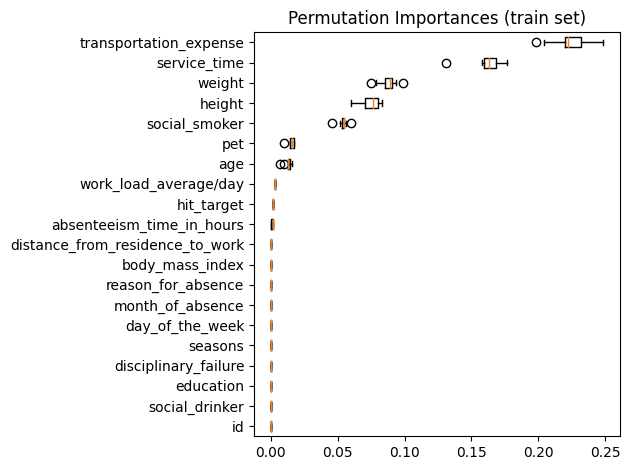

transportation_expense 0.224 +/- 0.015
service_time 0.162 +/- 0.012
weight   0.088 +/- 0.007
height   0.075 +/- 0.007
social_smoker 0.054 +/- 0.003
pet      0.016 +/- 0.002
age      0.013 +/- 0.002
work_load_average/day 0.003 +/- 0.000
hit_target 0.001 +/- 0.000
absenteeism_time_in_hours 0.001 +/- 0.001
distance_from_residence_to_work 0.000 +/- 0.000
body_mass_index 0.000 +/- 0.000
reason_for_absence 0.000 +/- 0.000
month_of_absence 0.000 +/- 0.000
day_of_the_week 0.000 +/- 0.000
seasons  0.000 +/- 0.000
disciplinary_failure 0.000 +/- 0.000
education 0.000 +/- 0.000
social_drinker 0.000 +/- 0.000
id       0.000 +/- 0.000


In [18]:
# Using categorical a numerical variables

atts_arr = np.array(atts)
result = permutation_importance(grid, X, y, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=atts_arr[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

for i in result.importances_mean.argsort()[::-1]:
     print(f"{atts_arr[i]:<8} "
           f"{result.importances_mean[i]:.3f}"
           f" +/- {result.importances_std[i]:.3f}")

- We choosed 9 attributes based on Permutaion importances  RF

- Select important attributes

In [100]:

selected_atts = ['transportation_expense', 'service_time', 'weight', 'height','social_smoker', 
                     'pet', 'age', 'work_load_average/day', 'hit_target']


selected_atts_idx=np.where(np.isin(atts,selected_atts))[0]


X_selected = X[:,selected_atts_idx]

We will used pipeline transformed before to created a clustering  as a step for pre processing data mining

In [101]:
df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ettyqueir

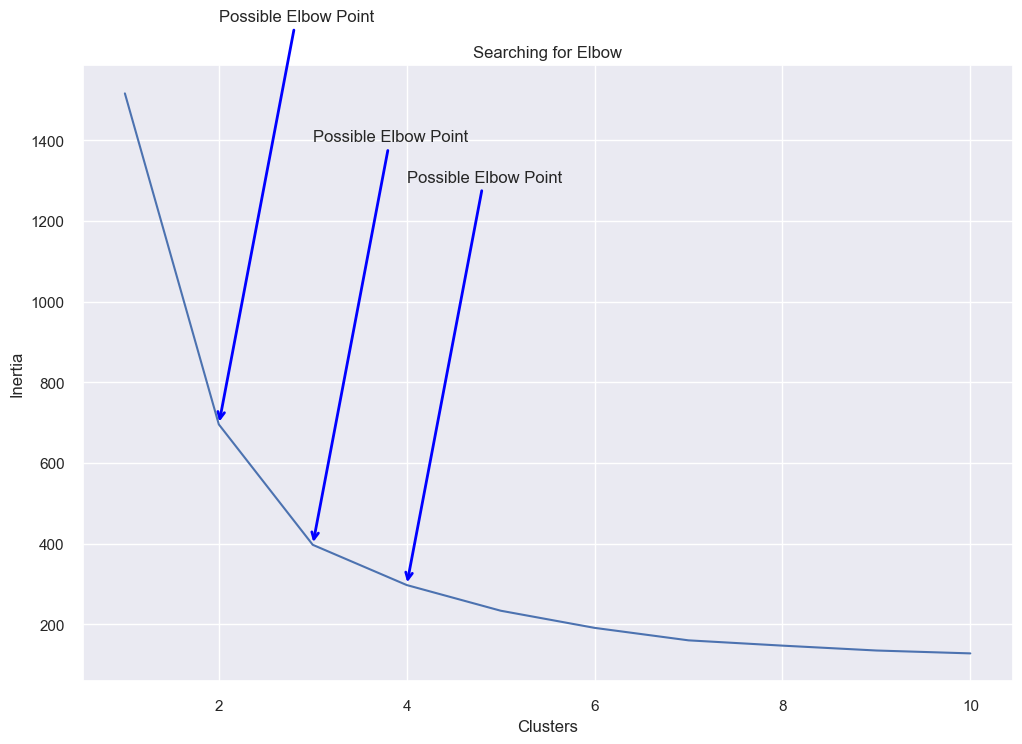

In [160]:
# run k-means for range of 10 clusters then analyse with elbow method
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X_selected)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(4, clusters[3]), xytext=(4, clusters[3]+1000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(3,clusters[2] ), xytext=(3, clusters[2]+1000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(2,clusters[1] ), xytext=(2, clusters[1]+1000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

# Another Technique to define n_cluster

/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ettyqueir

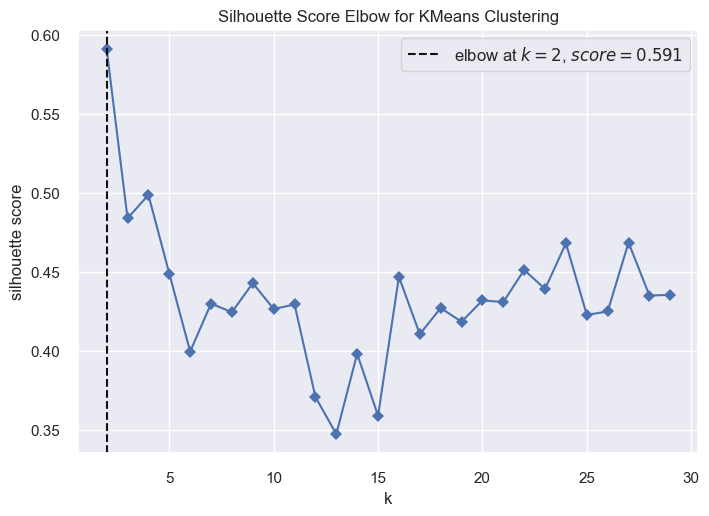

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [161]:


# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=42)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,30), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X_selected)    

visualizer.poof()  


- The Optimun K is when the inertia start to stabilized - = k=3

In [167]:
# 2 clusters
km2 = KMeans(n_clusters=2).fit(X_selected)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10, random_state=24).fit_transform(X_selected)
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km2.labels_])
fig.show()

#fig.write_html("test2.html") # save as test.html


/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



- We could see possible 2 groups but not clear at all

In [ ]:
km2

KMeans(n_clusters=2)

In [24]:
# Obtenemos los valores de la predicción (kmeans.predict(data)):
# km2.labels_

In [ ]:
km2.inertia_

4458.8933438043405

In [129]:
km2.n_iter_

11

In [ ]:
km2.cluster_centers_

array([[-5.81944045e-01,  6.76545890e-01,  5.89320261e-01,
         1.13251045e-01,  3.30781313e-02,  6.40740218e-01,
        -4.22894905e-02,  9.25531915e-01,  7.44680851e-02,
         8.03191489e-01,  1.48936170e-01,  2.92553191e-02,
         1.24900090e-16,  1.59574468e-02,  2.65957447e-03],
       [ 6.01129013e-01, -6.98849601e-01, -6.08748402e-01,
        -1.16984596e-01, -3.41686192e-02, -6.61863522e-01,
         4.36836496e-02,  9.28571429e-01,  7.14285714e-02,
         4.34065934e-01,  2.25274725e-01,  2.33516484e-01,
         8.79120879e-02, -1.56125113e-17,  1.92307692e-02]])

In [ ]:
from collections import Counter
Counter(km2.labels_)

Counter({1: 364, 0: 376})

In [132]:
# Here we build a scatter plot is then created with points colored by their assigned cluster.

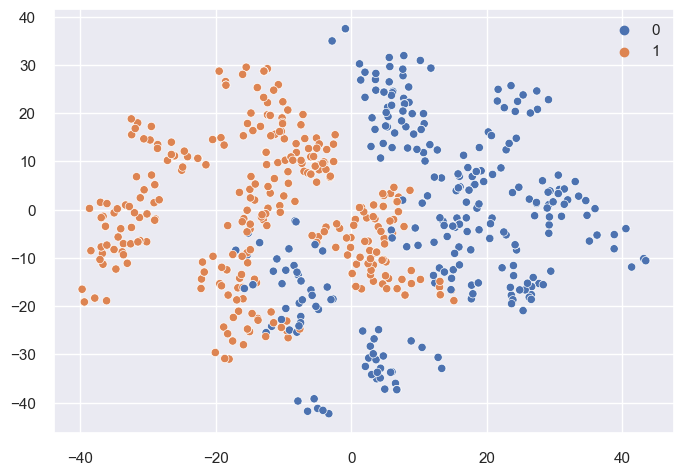

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=transformed , x=X_embedded [:,0], y=X_embedded [:,1], hue=km2.labels_)
plt.show()

-  Aunque aqui se les aprecia mas seria necesario mejorar 

In [168]:
# 3 clusters
km3 = KMeans(n_clusters=3).fit(X_selected)


# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10,random_state=24).fit_transform( X_selected )

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km3.labels_])
fig.show()



#fig.write_html("test.html") # save as test.html

/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



- In this case, a reasonable grouping is found

In [135]:
km3.inertia_


3911.9246372474713

/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ettyqueir

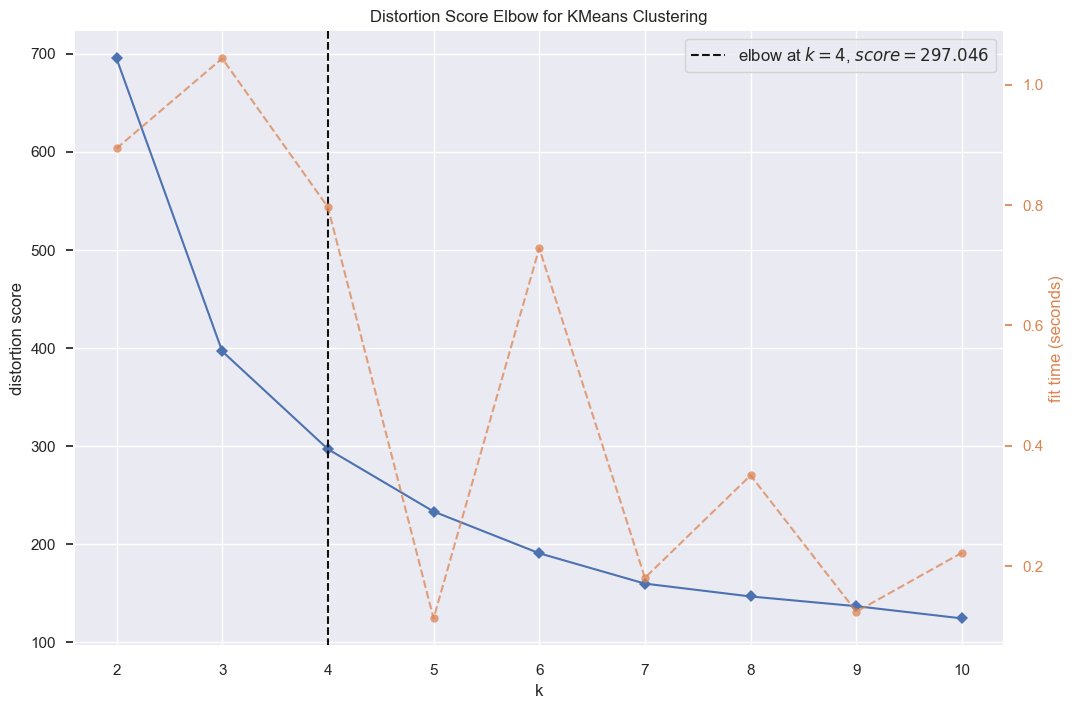

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [165]:
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(X_selected)
elbow_graph.show()

Froma above is clear that K= 4


_ We created a clusters with K = 4 

In [187]:
# 4 clusters
km4 = KMeans(n_clusters=4).fit(X_selected)


# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10,random_state=24).fit_transform( X_selected )

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km3.labels_])
fig.show()


/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [189]:
km4

KMeans(n_clusters=4)

In [190]:
km4.inertia_

297.04633349422033

In [191]:
# using k-means to form clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data_clean['Clusters'] = kmeans.fit_predict(X_selected) #fit the data and adding back clusters to the data in clusters column

/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



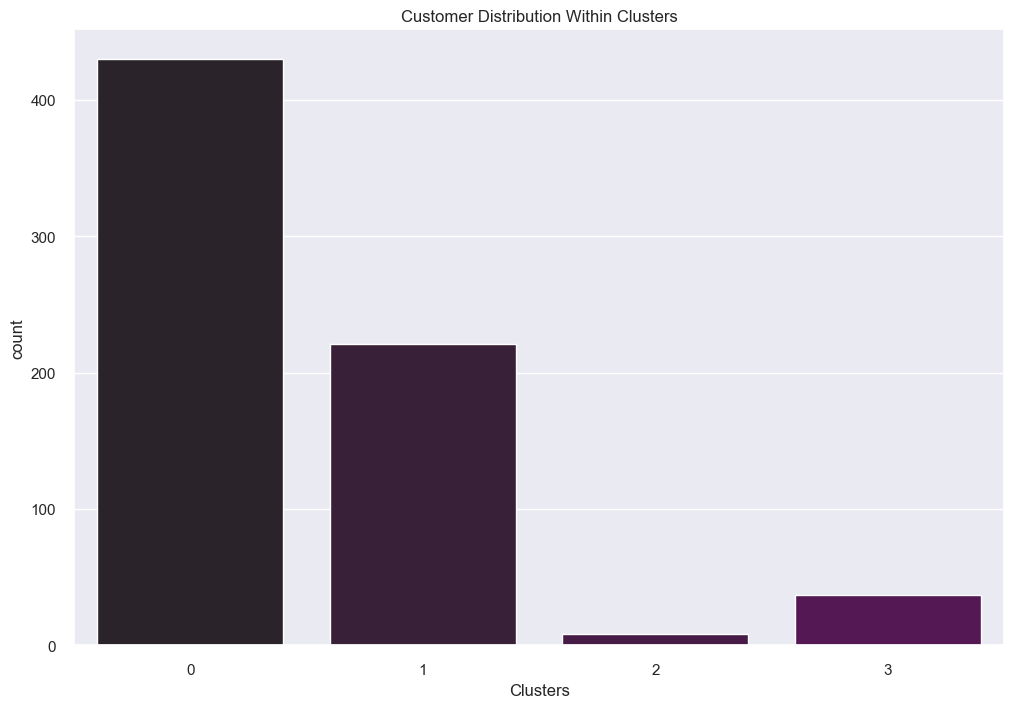

In [174]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=data_clean, palette=color)
plt.title('Customer Distribution Within Clusters')
plt.show()

_ Cluster 1 is that with highest number of employees and el 2 is with least employees.

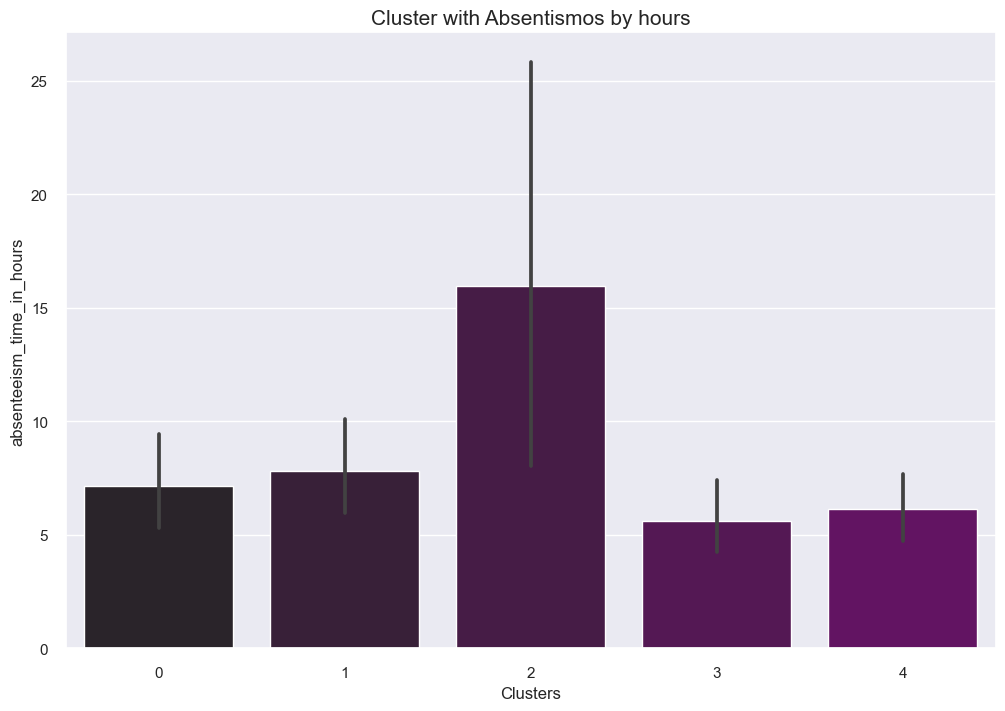

In [181]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df['absenteeism_time_in_hours'],palette=color)
plt.title('Cluster with Absentismos by hours', size=15)
plt.show()


the cluster with higher absenteeism is 2 and the 1 is with least 

In [43]:
import numpy as np

- Inertia baja a la mitad

In [33]:
# Peso de cada variable 

#X_embedded 

In [34]:
#len(km3.labels_)

- Into cluster results to dataframe

In [198]:
data_clean['Clusters']= km4.labels_

In [197]:
data_clean['Clusters'] = kmeans.fit_predict(X_selected) #fit the data and adding back clusters to the data in clusters columnters to the data in clusters column


/Users/ettyqueiroz/Documents/appuno/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [196]:
data_clean

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,cluster,Clusters,Cluster,clusters
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,90,172,30,4,0,1,1,1
1,36,0,7,3,1,118,13,18,50,239.554,...,0,0,98,178,31,0,2,0,0,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,0,89,170,31,2,2,0,0,0
3,7,7,7,5,1,279,5,14,39,239.554,...,1,0,68,168,24,4,2,0,0,0
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,90,172,30,2,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,90,172,30,8,0,1,1,1
736,1,11,7,3,1,235,11,14,37,264.604,...,0,1,88,172,29,4,0,1,1,1
737,4,0,0,3,1,118,14,13,40,271.219,...,0,8,98,170,34,0,1,2,2,2
738,8,0,0,4,2,231,35,14,39,271.219,...,0,2,100,170,35,0,0,1,1,1


In [199]:
# Yo define the color ( pallete )
color = (sns.dark_palette("purple"))
sns.set()

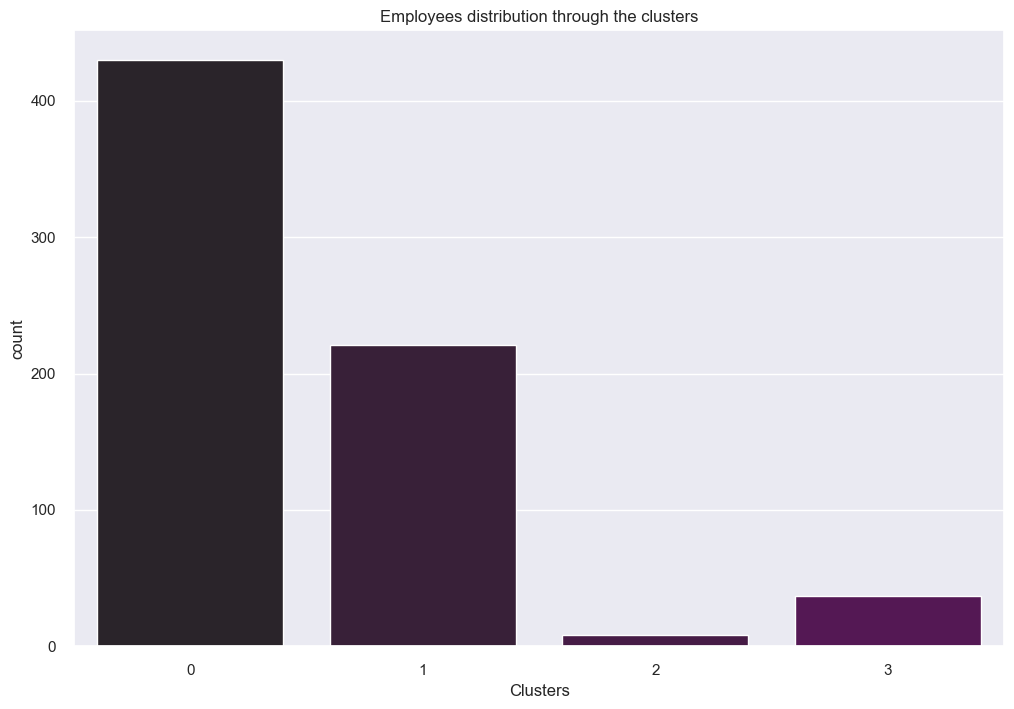

In [200]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=data_clean, palette=color)
plt.title('Employees distribution through the clusters')
plt.show()

- Cluster 1 has highest number os employees
- Cluster 3 has least numbre os employees

In [201]:
data_clean.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours', 'cluster', 'Clusters', 'Cluster',
       'clusters'],
      dtype='object')

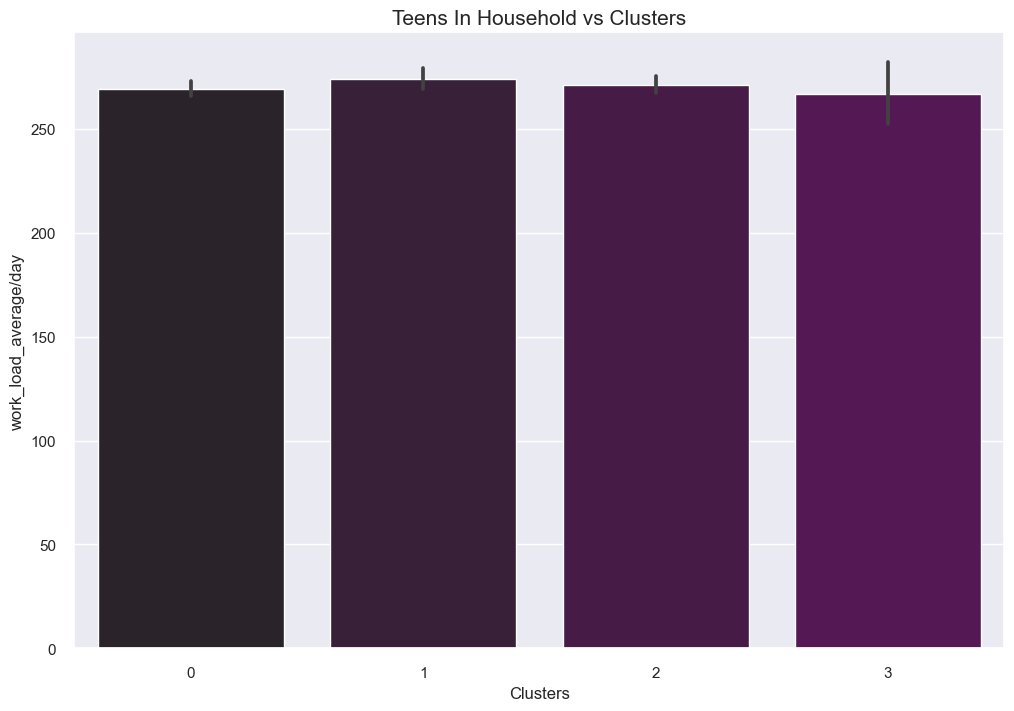

In [202]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=data_clean["Clusters"], y=data_clean["work_load_average/day"],palette=color)
plt.title("Teens In Household vs Clusters", size=15)
plt.show()

_Cluster 4 is with least 'work_load_average/day' 

but it all seems the same value

# Transaform data_clean as csv 

In [203]:
data_clean

#data_clean.to_csv("cluster1.csv", sep='\t')



,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,cluster,Clusters,Cluster,clusters
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,90,172,30,4,0,1,1,1
1,36,0,7,3,1,118,13,18,50,239.554,...,0,0,98,178,31,0,2,0,0,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,0,89,170,31,2,2,0,0,0
3,7,7,7,5,1,279,5,14,39,239.554,...,1,0,68,168,24,4,2,0,0,0
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,90,172,30,2,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,90,172,30,8,0,1,1,1
736,1,11,7,3,1,235,11,14,37,264.604,...,0,1,88,172,29,4,0,1,1,1
737,4,0,0,3,1,118,14,13,40,271.219,...,0,8,98,170,34,0,1,2,2,2
738,8,0,0,4,2,231,35,14,39,271.219,...,0,2,100,170,35,0,0,1,1,1


- # Filtering data_clean by groups of clusters

In [204]:
data_clean

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,cluster,Clusters,Cluster,clusters
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,90,172,30,4,0,1,1,1
1,36,0,7,3,1,118,13,18,50,239.554,...,0,0,98,178,31,0,2,0,0,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,0,89,170,31,2,2,0,0,0
3,7,7,7,5,1,279,5,14,39,239.554,...,1,0,68,168,24,4,2,0,0,0
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,90,172,30,2,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,90,172,30,8,0,1,1,1
736,1,11,7,3,1,235,11,14,37,264.604,...,0,1,88,172,29,4,0,1,1,1
737,4,0,0,3,1,118,14,13,40,271.219,...,0,8,98,170,34,0,1,2,2,2
738,8,0,0,4,2,231,35,14,39,271.219,...,0,2,100,170,35,0,0,1,1,1


In [222]:
# select rows containing ==2 
Group_3= data_clean[(data_clean['Clusters'] == 2)]


In [206]:
#Group_3


In [207]:
 # select rows containing ==1 
Group_2= data_clean[(data_clean['Clusters'] == 1)]

In [41]:
#Group_2

In [208]:
 # select rows containing ==0
Group_1= data_clean[(data_clean['cluster'] == 0)]

In [209]:
#Group_1

In [220]:
# select rows containing ==3
Group_4 = data_clean[(data_clean['cluster'] == 3)]

 # Knowing groups - clusters
 
    

In [224]:
Group_1.describe()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,cluster,Clusters,Cluster,clusters
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,...,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.0,221.0,221.0,221.0
mean,19.714932,19.710407,6.701357,3.990950,2.674208,249.959276,26.909502,12.180995,35.773756,273.956511,...,0.018100,1.429864,78.434389,170.108597,26.936652,4.208145,0.0,1.0,1.0,1.0
std,10.633788,7.667365,3.613290,1.334817,1.149195,31.624116,7.892514,3.371512,7.700852,37.303673,...,0.133614,0.496180,10.439065,2.824723,3.411953,3.342852,0.0,0.0,0.0,0.0
min,1.000000,0.000000,0.000000,2.000000,1.000000,179.000000,11.000000,9.000000,28.000000,205.917000,...,0.000000,1.000000,65.000000,165.000000,22.000000,0.000000,0.0,1.0,1.0,1.0
25%,11.000000,14.000000,3.000000,3.000000,2.000000,225.000000,25.000000,9.000000,28.000000,246.288000,...,0.000000,1.000000,69.000000,169.000000,24.000000,2.000000,0.0,1.0,1.0,1.0
50%,26.000000,23.000000,7.000000,4.000000,3.000000,235.000000,26.000000,13.000000,33.000000,265.615000,...,0.000000,1.000000,73.000000,171.000000,25.000000,3.000000,0.0,1.0,1.0,1.0
75%,28.000000,25.000000,10.000000,5.000000,4.000000,289.000000,31.000000,14.000000,40.000000,302.585000,...,0.000000,2.000000,88.000000,172.000000,30.000000,8.000000,0.0,1.0,1.0,1.0
max,35.000000,28.000000,12.000000,6.000000,4.000000,300.000000,48.000000,29.000000,58.000000,378.884000,...,1.000000,2.000000,108.000000,182.000000,36.000000,16.000000,0.0,1.0,1.0,1.0


In [225]:
Group_2.describe()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,cluster,Clusters,Cluster,clusters
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.000000
mean,11.422222,17.066667,6.822222,3.688889,2.466667,321.911111,47.400000,5.533333,32.822222,267.439289,...,0.311111,4.844444,76.933333,172.044444,25.955556,5.444444,1.0,2.822222,2.822222,2.822222
std,6.232207,8.483674,3.017290,1.489695,1.198484,67.848033,9.225459,4.362026,6.863238,44.304036,...,0.468179,1.521894,8.383967,4.193911,4.144852,3.361247,0.0,0.386646,0.386646,0.386646
min,2.000000,0.000000,0.000000,2.000000,1.000000,118.000000,14.000000,1.000000,28.000000,205.917000,...,0.000000,4.000000,65.000000,163.000000,21.000000,0.000000,1.0,2.000000,2.000000,2.000000
25%,10.000000,14.000000,5.000000,2.000000,1.000000,235.000000,49.000000,3.000000,28.000000,244.387000,...,0.000000,4.000000,68.000000,172.000000,21.000000,2.000000,1.0,3.000000,3.000000,3.000000
50%,10.000000,22.000000,7.000000,4.000000,3.000000,361.000000,52.000000,3.000000,28.000000,264.604000,...,0.000000,4.000000,80.000000,172.000000,27.000000,8.000000,1.0,3.000000,3.000000,3.000000
75%,12.000000,22.000000,8.000000,5.000000,3.000000,361.000000,52.000000,11.000000,36.000000,275.089000,...,1.000000,5.000000,80.000000,174.000000,27.000000,8.000000,1.0,3.000000,3.000000,3.000000
max,23.000000,28.000000,12.000000,6.000000,4.000000,378.000000,52.000000,13.000000,48.000000,378.884000,...,1.000000,8.000000,98.000000,178.000000,34.000000,8.000000,1.0,3.000000,3.000000,3.000000


In [226]:
Group_3.describe()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,cluster,Clusters,Cluster,clusters
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,...,8.0,8.0,8.000000,8.000000,8.000000,8.00000,8.0,8.0,8.0,8.0
mean,11.000000,16.375000,5.125000,4.000000,1.875000,218.62500,46.375000,2.500000,32.125000,271.267125,...,0.0,8.0,71.750000,177.000000,22.625000,4.25000,1.0,2.0,2.0,2.0
std,2.828427,7.308263,3.758324,1.603567,1.125992,40.65864,13.081475,4.242641,3.181981,6.243638,...,0.0,0.0,10.606602,2.828427,4.596194,3.24037,0.0,0.0,0.0,0.0
min,4.000000,0.000000,0.000000,2.000000,1.000000,118.00000,14.000000,1.000000,31.000000,264.249000,...,0.0,8.0,68.000000,170.000000,21.000000,0.00000,1.0,2.0,2.0,2.0
25%,12.000000,16.500000,2.000000,2.750000,1.000000,233.00000,51.000000,1.000000,31.000000,264.515250,...,0.0,8.0,68.000000,178.000000,21.000000,2.00000,1.0,2.0,2.0,2.0
50%,12.000000,19.000000,6.000000,4.000000,1.500000,233.00000,51.000000,1.000000,31.000000,273.154000,...,0.0,8.0,68.000000,178.000000,21.000000,3.00000,1.0,2.0,2.0,2.0
75%,12.000000,19.750000,6.250000,5.250000,2.250000,233.00000,51.000000,1.000000,31.000000,275.089000,...,0.0,8.0,68.000000,178.000000,21.000000,8.00000,1.0,2.0,2.0,2.0
max,12.000000,22.000000,12.000000,6.000000,4.000000,233.00000,51.000000,13.000000,40.000000,280.549000,...,0.0,8.0,98.000000,178.000000,34.000000,8.00000,1.0,2.0,2.0,2.0


In [227]:
Group_4.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: [id, reason_for_absence, month_of_absence, day_of_the_week, seasons, transportation_expense, distance_from_residence_to_work, service_time, age, work_load_average/day, hit_target, disciplinary_failure, education, son, social_drinker, social_smoker, pet, weight, height, body_mass_index, absenteeism_time_in_hours, cluster, Clusters, Cluster, clusters]
Index: []

[0 rows x 25 columns]>

# We building an  data frame to understand clusters features

In [219]:
import pandas as pd

datos = [[225.289,235.361,157.246, ], # definimos los datos de cada grupo 
         [25.31, 49.52, 13.51],
         [9.14, 3.11,10.18 ],
         [28.40, 28.36,34.38],
         [246.302,244.275,241.284],
         [69.88, 68.80,65.89],
         [169.172, 172.174,170.172],
         [1.2, 4.5, 0],
        [14.25, 14.22, 13.27],
        [1.2, 1.1, 0.1],
        [2.8, 2.8, 2.8],
        [4.2,5.4,4.2]]

columnas = ['group_1', 'group_2', 'group_3', Group_4] # definimos los nombres de las columnas
filas = ['transportation_expenses', 'distance', 'service time','age','work_load','weight','height', 'pet', 'reasons', 'son','absence','absence_mean'] # definimos los nombres de las filas

dn = pd.DataFrame(datos, columns=columnas, index=filas)

print(dn)

                         group_1  group_2  group_3
transportation_expenses  225.289  235.361  157.246
distance                  25.310   49.520   13.510
service time               9.140    3.110   10.180
age                       28.400   28.360   34.380
work_load                246.302  244.275  241.284
weight                    69.880   68.800   65.890
height                   169.172  172.174  170.172
pet                        1.200    4.500    0.000
reasons                   14.250   14.220   13.270
son                        1.200    1.100    0.100
absence                    2.800    2.800    2.800
absence_mean               4.200    5.400    4.200


Consideremos el rango(50% más frecuentes) de las caracteristicas de los groups observados

- Los funcionarios del grupo 3 gastam menos con transporte, porque vivem mas cerca, 
  están a mas meses en la empresa, pesam menos, no tienen pet y tampoco hijos (VIVEM MÁS CERCA, y TRABAJAN A MAS TIEMPO)
- Los del grupo 2 estan mas lejos de la empresa donde trabajan, gastan mas con el transporte, 
  poséen de 4 a 5 pets,un hijo, y tambien son los que menos tiempo tienen en la empresa. (VIVEM MAS LEJOS)
- Los que estan en el grupo uno poseen, tienn 1 a 2 pets y son los que acumulam mas horas/trabajadas/dia, no viven lejos ni cerca, (PASAN MAS HORAS DEL DIA EN LA EMPRESA)

In [48]:
Group_id11= data_clean[(data_clean['id'] == 11)]

In [49]:
Group_id11

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,cluster
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,0
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,0
24,11,18,8,2,1,289,36,13,33,205.917,...,1,2,1,0,1,90,172,30,8,0
26,11,23,8,3,1,289,36,13,33,205.917,...,1,2,1,0,1,90,172,30,1,0
28,11,18,8,4,1,289,36,13,33,205.917,...,1,2,1,0,1,90,172,30,8,0
36,11,24,8,3,1,289,36,13,33,205.917,...,1,2,1,0,1,90,172,30,8,0
54,11,0,9,3,4,289,36,13,33,241.476,...,1,2,1,0,1,90,172,30,0,0
77,11,26,10,4,4,289,36,13,33,253.465,...,1,2,1,0,1,90,172,30,8,0
130,11,18,1,3,2,289,36,13,33,308.593,...,1,2,1,0,1,90,172,30,8,0
136,11,22,1,5,2,289,36,13,33,308.593,...,1,2,1,0,1,90,172,30,3,0


In [50]:
# 4 clusters
#km4 = KMeans(n_clusters=4).fit(X_selected)

# plot using tsne 
#X_embedded  = TSNE(n_components=3, perplexity=10,random_state=24).fit_transform( X_selected )

#fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km4.labels_])
#fig.show()

- Inertia ya no baja tanto 

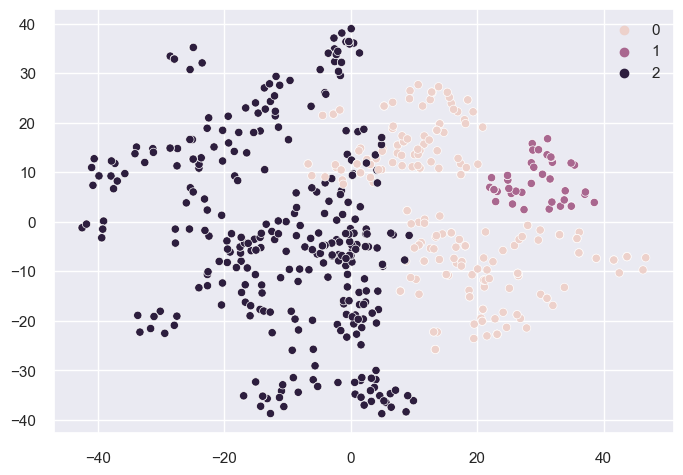

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=X_selected , x=X_embedded [:,0], y=X_embedded [:,1], hue=km3.labels_)
plt.show()

/var/folders/2s/pjl2sg357mxgsvkyn1r7tjkm0000gn/T/ipykernel_5305/3057197446.py:5: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



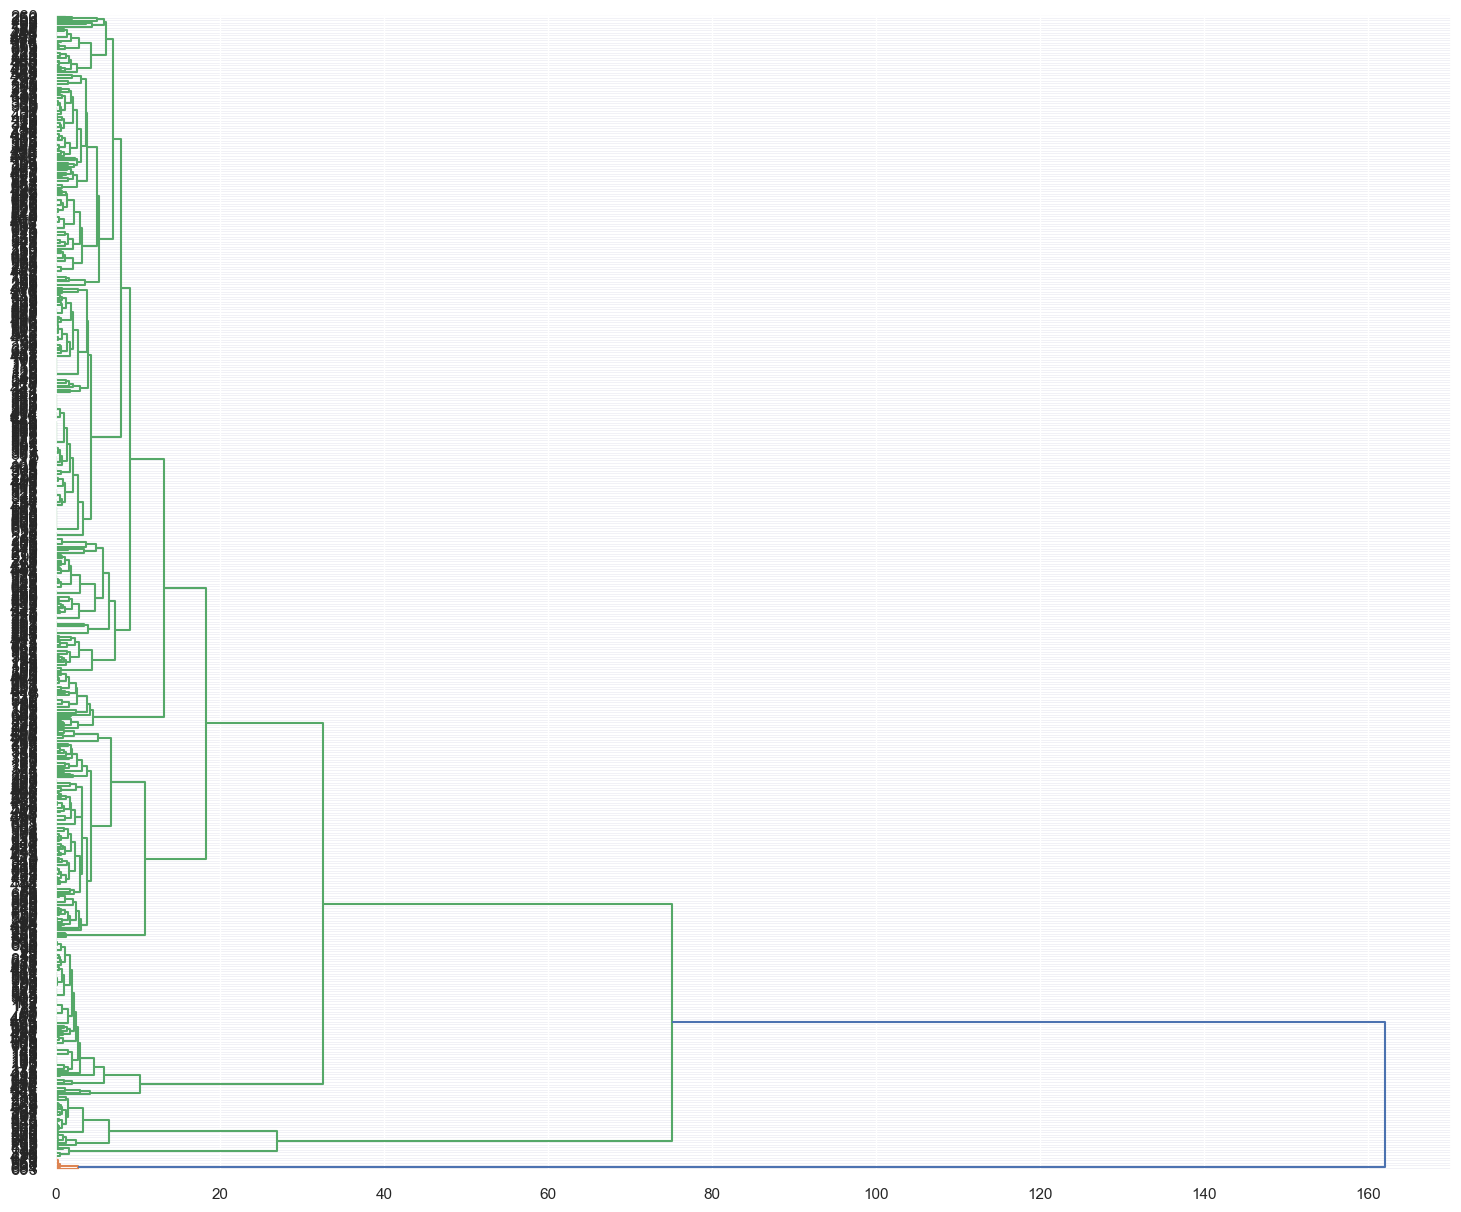

In [76]:
# there's no inertia in attribute of AgglomerativeClustering class so we use scipy's distance matrix
dist = distance_matrix(X_selected, X_selected)

# dendrogram
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 15))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')


In [77]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
# separate features and target column
x = data_clean.drop('Clusters', axis=1)
y = data_clean['Clusters']

In [79]:
# create train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [81]:
# adding GradientBoostingClassifier to transformer pipeline
final_pipeline = make_pipeline(X_selected, GradientBoostingClassifier())

NameError: name 'make_pipeline' is not defined

In [ ]:
# fit the data to new pipeline & model
final_pipeline.fit(x_train, y_train)

In [ ]:
# check the accuracy of our model
final_pipeline.score(x_test, y_test)

In [ ]:
import pickle

In [ ]:
filename = 'classifier.pkl' # create a variable with name you wanna give to the file
pickle.dump(final_pipeline, open(filename,'wb')) 